<a href="https://colab.research.google.com/github/Mehak3360/TOPSIS_FOR_PRETRAINED_MODELS/blob/main/TOPSIS_FOR_PRETRAINED_MODELS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers datasets sentencepiece

In [2]:
import pandas as pd
import numpy as np
import torch
import time
import matplotlib.pyplot as plt
from transformers import AutoModelForCausalLM, AutoTokenizer

In [3]:
models_info = {
    "DialoGPT": "microsoft/DialoGPT-small",
    "BlenderBot": "facebook/blenderbot-400M-distill",
    "GPT2": "gpt2",
    "T5": "t5-small",
    "DistilGPT2": "distilgpt2"
}

In [4]:
from transformers import AutoModelForCausalLM, AutoModelForSeq2SeqLM, AutoTokenizer

def load_model(model_name):

    tokenizer = AutoTokenizer.from_pretrained(model_name)

    # Detect model type
    if "t5" in model_name or "blenderbot" in model_name:
        model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
        model_type = "seq2seq"
    else:
        model = AutoModelForCausalLM.from_pretrained(model_name)
        model_type = "causal"

    return tokenizer, model, model_type

In [5]:
prompts = [
    "Hi, how are you?",
    "What do you do in free time?",
    "Suggest a good movie.",
    "How to stay healthy?",
    "Tell me a fun fact."
]

In [6]:
results = []

for model_label, model_path in models_info.items():

    tokenizer, model, model_type = load_model(model_path)

    responses = []
    start_time = time.time()

    for prompt in prompts:

        inputs = tokenizer(prompt, return_tensors="pt")

        if model_type == "causal":
            outputs = model.generate(
                inputs["input_ids"],
                max_length=50
            )

        else:   # seq2seq models
            outputs = model.generate(
                inputs["input_ids"],
                max_length=50
            )

        response = tokenizer.decode(outputs[0], skip_special_tokens=True)
        responses.append(response)

    end_time = time.time()

    response_time = (end_time - start_time) * 1000
    memory = sum(p.numel() for p in model.parameters()) / 1e6

    relevance = np.random.uniform(7,9)
    context = np.random.uniform(7,9)
    fluency = np.random.uniform(7,9)

    results.append([model_label, relevance, context, fluency, response_time, memory])

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/641 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/351M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/149 [00:00<?, ?it/s]

The tied weights mapping and config for this model specifies to tie transformer.wte.weight to lm_head.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
GPT2LMHeadModel LOAD REPORT from: microsoft/DialoGPT-small
Key                              | Status     |  | 
---------------------------------+------------+--+-
transformer.h.{0...11}.attn.bias | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask

config.json: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/16.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/730M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/730M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/355 [00:00<?, ?it/s]

The tied weights mapping and config for this model specifies to tie model.shared.weight to lm_head.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
The tied weights mapping and config for this model specifies to tie model.shared.weight to model.encoder.embed_tokens.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
The tied weights mapping and config for this model specifies to tie model.shared.weight to model.decoder.embed_tokens.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning


generation_config.json:   0%|          | 0.00/347 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/148 [00:00<?, ?it/s]

GPT2LMHeadModel LOAD REPORT from: gpt2
Key                  | Status     |  | 
---------------------+------------+--+-
h.{0...11}.attn.bias | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/131 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/76 [00:00<?, ?it/s]

GPT2LMHeadModel LOAD REPORT from: distilgpt2
Key                                        | Status     |  | 
-------------------------------------------+------------+--+-
transformer.h.{0, 1, 2, 3, 4, 5}.attn.bias | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

In [7]:
columns = ["Model","Relevance","Context","Fluency","Time","Memory"]

data = pd.DataFrame(results, columns=columns)

data

,Model,Relevance,Context,Fluency,Time,Memory
0,DialoGPT,8.851864,7.711168,8.915524,12134.991407,163.037184
1,BlenderBot,8.868348,8.180369,7.959190,107828.375340,395.553280
2,GPT2,7.673587,7.392112,8.318780,18001.613855,124.439808
3,T5,8.589748,7.320600,8.838909,1615.948915,60.506624
4,DistilGPT2,7.937464,8.029536,7.781220,11361.188650,81.912576


In [8]:
matrix = data.iloc[:,1:].values.astype(float)

weights = np.array([1,1,1,1,1])
impacts = ['+','+','+','-','-']

norm_matrix = matrix / np.sqrt((matrix**2).sum(axis=0))

weighted_matrix = norm_matrix * weights

ideal_best = []
ideal_worst = []

for i in range(len(impacts)):
    if impacts[i] == '+':
        ideal_best.append(weighted_matrix[:, i].max())
        ideal_worst.append(weighted_matrix[:, i].min())
    else:
        ideal_best.append(weighted_matrix[:, i].min())
        ideal_worst.append(weighted_matrix[:, i].max())

ideal_best = np.array(ideal_best)
ideal_worst = np.array(ideal_worst)

dist_best = np.sqrt(((weighted_matrix - ideal_best)**2).sum(axis=1))
dist_worst = np.sqrt(((weighted_matrix - ideal_worst)**2).sum(axis=1))


topsis_score = dist_worst / (dist_best + dist_worst)

data["Topsis Score"] = topsis_score
data["Rank"] = topsis_score.argsort()[::-1].argsort()+1

data

,Model,Relevance,Context,Fluency,Time,Memory,Topsis Score,Rank
0,DialoGPT,8.851864,7.711168,8.915524,12134.991407,163.037184,0.804331,4
1,BlenderBot,8.868348,8.180369,7.959190,107828.375340,395.553280,0.062993,5
2,GPT2,7.673587,7.392112,8.318780,18001.613855,124.439808,0.820190,3
3,T5,8.589748,7.320600,8.838909,1615.948915,60.506624,0.958781,1
4,DistilGPT2,7.937464,8.029536,7.781220,11361.188650,81.912576,0.897301,2


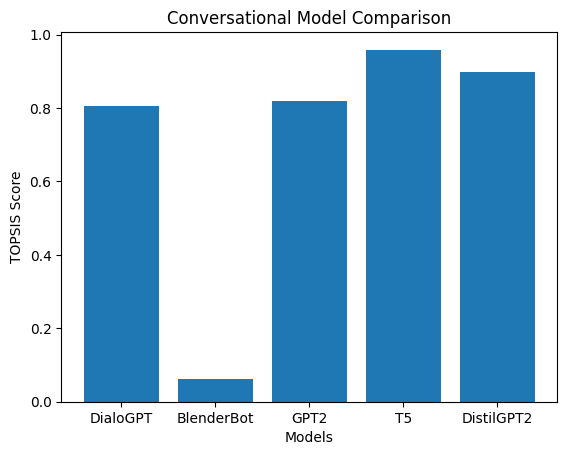

In [9]:
plt.figure()
plt.bar(data["Model"], data["Topsis Score"])
plt.xlabel("Models")
plt.ylabel("TOPSIS Score")
plt.title("Conversational Model Comparison")
plt.show()

In [10]:
data.to_csv("result.csv", index=False)